In [ ]:
"""
Kelompok 10
Muhammad Hermawan Alghozy (1301213473)
Dito Rifadli Febrian      (1301213518)
Raditha Ariyani           (1301213527)
"""

In [3]:
#Mengimpor library
import pandas as pd
import requests
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
#membaca dataset dari URL ke dalam DataFrame
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'
df = pd.read_csv(url, header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [7]:
# Mengganti beberapa nama kolom dalam DataFrame dengan menggunakan dictionary
df = df.rename(columns={0: 'Age',1: 'Gender',2: 'Height',3: 'Weight',4: 'QRS_duration',5: 'P-R_interval',6: 'Q-T_interval', 7: 'T_interval', 8: 'P_interval', 
                        9: 'QRS', 10: 'T', 11:'P', 12: 'QRST', 13: 'J', 14: 'Heart_rate'})

In [8]:
# Menampilkan nama-nama kolom dalam DataFrame
df.columns.values

array(['Age', 'Gender', 'Height', 'Weight', 'QRS_duration',
       'P-R_interval', 'Q-T_interval', 'T_interval', 'P_interval', 'QRS',
       'T', 'P', 'QRST', 'J', 'Heart_rate', 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 

In [9]:
# Menampilkan informasi tentang DataFrame, termasuk jumlah entri dan tipe data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [10]:
# Menampilkan dataFrame
df

,Age,Gender,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [11]:
# Menghapus kolom 'QRS' dari DataFrame
df = df.drop(['QRS'], axis = 1)

In [12]:
# Menampilkan dataFrame
df

,Age,Gender,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,T,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,13,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,37,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,34,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,11,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,13,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,4,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,66,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-19,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,29,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [13]:
# Membagi dataset menjadi beberapa lipatan (folds) untuk validasi silang
fold1 = (df.iloc[0:150].reset_index(drop=True), df.iloc[300:452].reset_index(drop=True))
fold2 = (df.iloc[150:300].reset_index(drop=True), pd.concat([df.iloc[0:150], df.iloc[300:452]]).reset_index(drop=True))
fold3 = (df.iloc[300:452].reset_index(drop=True), df.iloc[0:150].reset_index(drop=True))

In [14]:
#Fungsi Normalisasi
def norm(allData, columnTarget):
  for column in columnTarget:
    allData[column] = (allData[column]-allData[column].min()) / (allData[column].max()-allData[column].min())

  return allData

In [15]:
# Melakukan normalisasi pada kolom 'Age', 'Gender', dan 'QRS_duration' dalam DataFrame
testStartID = df.index.stop
allData = pd.concat([df])
allData = norm(allData, ['Age','Gender','QRS_duration'])
normTrain= allData.iloc[:testStartID].drop('Height', axis=1)
normTrain

,Age,Gender,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,T,P,...,270,271,272,273,274,275,276,277,278,279
0,0.903614,0.0,80,0.270677,193,371,174,121,13,64,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,0.674699,1.0,64,0.195489,174,401,149,39,37,-17,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,0.650602,0.0,95,0.624060,163,386,185,102,34,70,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,0.662651,0.0,94,0.338346,202,380,179,143,11,-5,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,0.903614,0.0,80,0.248120,181,360,177,103,13,61,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1.0,70,0.187970,199,382,154,117,4,40,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,0.445783,0.0,85,0.338346,137,361,201,73,66,52,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,0.433735,0.0,68,0.398496,176,365,194,116,-19,-61,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,0.385542,1.0,55,0.285714,106,386,218,63,29,-22,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [16]:
# Menampilkan beberapa baris pertama dari hasil normalisasi
normTrain.head()

,Age,Gender,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,T,P,...,270,271,272,273,274,275,276,277,278,279
0,0.903614,0.0,80,0.270677,193,371,174,121,13,64,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,0.674699,1.0,64,0.195489,174,401,149,39,37,-17,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,0.650602,0.0,95,0.624060,163,386,185,102,34,70,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,0.662651,0.0,94,0.338346,202,380,179,143,11,-5,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,0.903614,0.0,80,0.248120,181,360,177,103,13,61,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [17]:
#Fungsi Standarisasi
def Standarisasi(allData, columnTarget):
  for column in columnTarget:
    allData[column] = (allData[column] - allData[column].mean()) / allData[column].std()

  return allData

In [18]:
# Melakukan normalisasi pada kolom 'Age', 'Gender', dan 'QRS_duration' dalam DataFrame
testStartID = df.index.stop
allData = pd.concat([df])
allData = Standarisasi(allData, ['Age','Gender','QRS_duration'])
stdrTrain= allData.iloc[:testStartID].drop('Height', axis=1)
stdrTrain

,Age,Gender,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,T,P,...,270,271,272,273,274,275,276,277,278,279
0,1.732520,-1.106294,80,0.135355,193,371,174,121,13,64,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,0.578671,0.901919,64,-0.515501,174,401,149,39,37,-17,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,0.457213,-1.106294,95,3.194376,163,386,185,102,34,70,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,0.517942,-1.106294,94,0.721125,202,380,179,143,11,-5,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,1.732520,-1.106294,80,-0.059902,181,360,177,103,13,61,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.396484,0.901919,70,-0.580586,199,382,154,117,4,40,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,-0.575178,-1.106294,85,0.721125,137,361,201,73,66,52,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,-0.635907,-1.106294,68,1.241809,176,365,194,116,-19,-61,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,-0.878822,0.901919,55,0.265526,106,386,218,63,29,-22,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [19]:
# Menampilkan beberapa baris pertama dari hasil standarisasi
stdrTrain.head()

,Age,Gender,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,T,P,...,270,271,272,273,274,275,276,277,278,279
0,1.732520,-1.106294,80,0.135355,193,371,174,121,13,64,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,0.578671,0.901919,64,-0.515501,174,401,149,39,37,-17,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,0.457213,-1.106294,95,3.194376,163,386,185,102,34,70,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,0.517942,-1.106294,94,0.721125,202,380,179,143,11,-5,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,1.732520,-1.106294,80,-0.059902,181,360,177,103,13,61,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [20]:
# Fungsi untuk menghitung probabilitas suatu nilai dengan menggunakan mean dan standard deviation
def probality(mean, std, x):
  exponent = math.exp(-((x-mean)**2 / (2 * std**2)))
  return (1/(math.sqrt(2*math.pi)*std)) * exponent

In [21]:
# Fungsi untuk membagi DataFrame menjadi DataFrames terpisah berdasarkan nilai pada kolom target
def splitTruth(df, columnTarget):
  truthData = []
  for truth in df[columnTarget].unique():
    truthData.append(df.where(df[columnTarget] == truth).dropna())
  return truthData

yesData, noData= splitTruth(df, columnTarget='Gender')

In [22]:
#Membaca nilai 1 yang disimpan di yesData
yesData.head()

,Age,Gender,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,T,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,13,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,34,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,11,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,13,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
5,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,66,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14.0


In [23]:
#Membaca nilai 0 yang disimpan di noData
noData.head()

,Age,Gender,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,T,...,270,271,272,273,274,275,276,277,278,279
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,37,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
6,40.0,1.0,160.0,52.0,77.0,129.0,377.0,133.0,77.0,49,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1.0
7,49.0,1.0,162.0,54.0,78.0,0.0,376.0,157.0,70.0,7,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1.0
9,50.0,1.0,167.0,67.0,89.0,130.0,383.0,156.0,73.0,34,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10.0
11,45.0,1.0,165.0,86.0,77.0,143.0,373.0,150.0,65.0,37,...,0.0,4.4,-2.2,0.0,0.0,0.5,1.5,4.9,17.2,1.0


In [24]:
# Fungsi untuk menghitung mean dari kolom-kolom tertentu untuk nilai '1' dan '0' secara terpisah
def findMean(yesData, noData, columnTarget):
  yesMean = dict()
  noMean = dict()
  for column in columnTarget :
    yesMean[column] = yesData[column].mean()
    noMean[column] = noData[column].mean()
  return yesMean, noMean
  
# Menghitung mean untuk kolom 'Age', 'Gender', dan 'QRS_duration' untuk nilai '1' dan '0'
yesMean, noMean = findMean(yesData, noData, columnTarget = ['Age','Gender','QRS_duration'])

print(f"Mean Result\n1 : {yesMean}\n0 : {noMean}")

Mean Result
1 : {'Age': 47.54679802955665, 'Gender': 0.0, 'QRS_duration': 94.65024630541872}
0 : {'Age': 45.59437751004016, 'Gender': 1.0, 'QRS_duration': 84.24899598393574}


In [25]:
# Fungsi untuk menghitung standard deviation dari kolom-kolom tertentu untuk nilai '1' dan '0' secara terpisah
def findStd(yesData, noData, columnTarget):
  yesStd = dict()
  noStd = dict()
  for column in columnTarget :
    yesStd[column] = yesData[column].std()
    noStd[column] = noData[column].std()

  return yesStd, noStd

yesStd, noStd = findStd(yesData, noData, columnTarget = ['Age','Gender','QRS_duration'])
print(f"Mean result\n1 : {yesStd}\n0 : {noStd}")

Mean result
1 : {'Age': 16.51976095689243, 'Gender': 0.0, 'QRS_duration': 14.49550416605584}
0 : {'Age': 16.4041733636294, 'Gender': 0.0, 'QRS_duration': 14.469456463836323}


In [26]:
# Fungsi untuk melakukan prediksi nilai pada kolom target berdasarkan Naive Bayes classifier menggunakan mean dan standard deviation yang telah dihitung
def prediction(yesMean, yesStd, noMean, noStd, target, columnTarget, truthColumn):
    result = []
    for i in range(len(target)):
      yesResult = 1
      noResult = 1
      for column in columnTarget:
        yesResult *= probality(yesMean[column], yesStd[column], target[column].iloc[i])
        noResult *= probality(noMean[column], noStd[column], target[column].iloc[i])
      
      result.append({'QRS Duration' : target['QRS_duration'].iloc[i], 
                     'Yes Probability' : "{}".format(yesResult), 
                     'No Probability' : "{}".format(noResult),
                     'Prediction Result' : int(yesResult > noResult),
                     'Ground Truth' : target[truthColumn].iloc[i]})

    return result

result = []
target = df
result = prediction(yesMean, yesStd, noMean, noStd, target, columnTarget = ['QRS_duration'], truthColumn='Gender')

for p in result:
  print(p)

{'QRS Duration': 91, 'Yes Probability': '0.026662864283109128', 'No Probability': '0.02472792861558617', 'Prediction Result': 1, 'Ground Truth': 0}
{'QRS Duration': 81, 'Yes Probability': '0.017665079810871016', 'No Probability': '0.026884967112852858', 'Prediction Result': 0, 'Ground Truth': 1}
{'QRS Duration': 138, 'Yes Probability': '0.0003145027046841236', 'No Probability': '2.7790566715598104e-05', 'Prediction Result': 1, 'Ground Truth': 0}
{'QRS Duration': 100, 'Yes Probability': '0.02570985720509818', 'No Probability': '0.015245515049765792', 'Prediction Result': 1, 'Ground Truth': 0}
{'QRS Duration': 88, 'Yes Probability': '0.02477261210760072', 'No Probability': '0.026660287988380597', 'Prediction Result': 0, 'Ground Truth': 0}
{'QRS Duration': 100, 'Yes Probability': '0.02570985720509818', 'No Probability': '0.015245515049765792', 'Prediction Result': 1, 'Ground Truth': 0}
{'QRS Duration': 77, 'Yes Probability': '0.013113727807341734', 'No Probability': '0.024319615639088892'

In [27]:
# Fungsi untuk membagi dataset menjadi training set dan validation set berdasarkan persentase dan lokasi
def folding(dataset, trainingPercentage, location, shuffle:bool):
    lengthTraining = int(len(dataset)*trainingPercentage/100)
    # randomize the the data position
    if(shuffle):
        dataset = dataset.sample(frac=1).reset_index(drop=True)
    naive = []
    validation = []
    if(location == 'left'):
        naive, validation = dataset.iloc[:lengthTraining].reset_index(drop=True), dataset.iloc[lengthTraining:].reset_index(drop=True)
    elif(location == 'right'):
        validation,naive = dataset.iloc[:abs(lengthTraining-len(dataset))].reset_index(drop=True), dataset.iloc[abs(lengthTraining-len(dataset)):].reset_index(drop=True)
    elif(location == 'middle'):
        naive = dataset.iloc[int(abs(lengthTraining-len(dataset))/2):len(dataset)-int(abs(lengthTraining-len(dataset))/2)]
        validation = pd.concat([dataset.iloc[:int(abs(lengthTraining-len(dataset))/2)],dataset.iloc[len(dataset)-int(abs(lengthTraining-len(dataset))/2):]])
    return naive,validation

dataTrain, validationData = folding(df.copy(), 70, 'left', shuffle=True)

In [28]:
# Menampilkan training set
dataTrain

,Age,Gender,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,T,...,270,271,272,273,274,275,276,277,278,279
0,47,0,169,80,89,142,369,155,91,-15,...,-0.5,9.4,0.0,0.0,0.0,0.7,1.4,22.0,32.9,1
1,40,1,160,51,86,177,367,147,113,4,...,0.0,6.5,-2.2,0.0,0.0,0.6,0.7,10.4,14.4,1
2,13,1,133,30,96,176,356,171,137,-63,...,-1.3,11.3,0.0,0.0,0.0,2.4,-1.8,32.1,18.8,16
3,69,1,160,71,75,156,322,172,105,8,...,0.0,6.6,-0.8,0.0,0.0,0.2,1.3,11.8,23.5,5
4,57,0,175,81,80,163,364,169,118,12,...,0.0,5.3,0.0,0.0,0.0,0.4,1.5,12.7,26.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,40,0,162,65,114,191,383,222,98,15,...,-1.6,8.8,-1.2,0.0,0.0,0.6,-0.6,14.0,9.0,4
312,35,1,155,58,81,184,386,153,89,50,...,0.0,6.3,-0.5,0.0,0.0,0.5,1.9,15.4,31.3,1
313,55,0,185,105,87,292,406,192,175,58,...,0.0,9.4,-1.9,0.0,0.0,-0.3,2.2,19.5,37.1,1
314,79,1,150,60,93,178,361,132,80,46,...,0.0,6.7,0.0,0.0,0.0,-0.2,-0.9,20.1,13.1,2


In [29]:
# Menampilkan validation set
validationData

,Age,Gender,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,T,...,270,271,272,273,274,275,276,277,278,279
0,46,1,158,58,70,120,353,122,52,49,...,0.0,6.6,0.0,0.0,0.0,0.3,0.7,17.1,20.8,1
1,51,0,156,60,79,145,377,172,83,-8,...,-0.4,6.5,-0.9,0.0,0.0,0.8,0.6,9.8,14.6,4
2,45,1,162,61,75,122,357,143,72,8,...,0.0,11.6,0.0,0.0,0.0,0.7,1.4,27.8,35.9,1
3,40,1,150,48,84,160,426,165,64,65,...,0.0,13.6,-2.3,0.0,0.0,0.2,2.6,31.2,54.0,6
4,76,1,150,54,71,186,388,170,104,83,...,0.0,10.2,0.0,0.0,0.0,0.4,1.1,26.5,43.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,72,1,160,70,79,152,368,156,97,49,...,0.0,8.7,-0.7,0.0,0.0,0.5,2.0,21.4,35.8,1
132,47,0,171,59,82,145,347,169,61,75,...,0.0,9.4,-1.7,0.0,0.0,0.6,2.3,19.5,41.1,10
133,56,0,173,84,98,173,372,161,86,38,...,-0.9,10.9,-1.1,0.0,0.0,0.5,2.7,23.0,48.9,6
134,34,0,170,73,94,186,373,224,125,52,...,0.0,15.3,-1.1,0.0,0.0,0.6,2.6,44.0,68.4,14


In [30]:
dataTrain, validationData = splitTruth(df, columnTarget='Gender')

In [31]:
# Split yes and no
yesDataTrain, noDataTrain = splitTruth(df, columnTarget='Gender')
# Find mean
yesMeanTrain, noMeanTrain = findMean(yesDataTrain, noDataTrain, columnTarget=['Age','Weight','QRS_duration'])
# Find standard deviation
yesStdTrain, noStdTrain = findStd(yesDataTrain, noDataTrain, ['Age','Weight','QRS_duration'])

result = []
target = validationData # your ground truth data
# Melakukan prediksi pada validation set menggunakan Naive Bayes classifier yang telah dilatih pada training set
result = prediction(yesMeanTrain, yesStdTrain, noMeanTrain, noStdTrain, target, columnTarget=['Age','Weight','QRS_duration'], truthColumn='Gender')

for p in result:
    print(p)

{'QRS Duration': 81.0, 'Yes Probability': '7.506629591462039e-06', 'No Probability': '1.4446072251796741e-05', 'Prediction Result': 0, 'Ground Truth': 1.0}
{'QRS Duration': 77.0, 'Yes Probability': '3.2322821647489004e-06', 'No Probability': '1.0563360080708498e-05', 'Prediction Result': 0, 'Ground Truth': 1.0}
{'QRS Duration': 78.0, 'Yes Probability': '4.405378003116694e-06', 'No Probability': '1.2571548758898764e-05', 'Prediction Result': 0, 'Ground Truth': 1.0}
{'QRS Duration': 89.0, 'Yes Probability': '1.310725817356967e-05', 'No Probability': '1.6321671880536438e-05', 'Prediction Result': 0, 'Ground Truth': 1.0}
{'QRS Duration': 77.0, 'Yes Probability': '5.338897192755498e-06', 'No Probability': '5.506171734248559e-06', 'Prediction Result': 0, 'Ground Truth': 1.0}
{'QRS Duration': 78.0, 'Yes Probability': '5.086928392653501e-06', 'No Probability': '1.3157975731809436e-05', 'Prediction Result': 0, 'Ground Truth': 1.0}
{'QRS Duration': 77.0, 'Yes Probability': '4.8140888597385455e-0

In [32]:
# Fungsi untuk menghitung dan menampilkan confusion matrix, akurasi, precision, recall dan F1 Score
def confussionMatrix(result):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    x = True
    for i in result:
        if(i['Ground Truth'] == '?'):
            x = False
            break
        elif((i['Prediction Result'] == 1) and (i['Prediction Result'] == i['Ground Truth'])):
            TP += 1
        elif((i['Prediction Result'] == 0) and (i['Prediction Result'] == i['Ground Truth'])):
            TN += 1
        elif((i['Prediction Result'] == 1) and (i['Prediction Result'] != i['Ground Truth'])):
            FP += 1
        elif((i['Prediction Result'] == 0) and (i['Prediction Result'] != i['Ground Truth'])):
            FN += 1 
    if x:
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1_score = 2 * (precision * recall) / (precision + recall)
        
        print(f"\nTP: {TP}  FN: {FP}\nTN: {TN}  FN: {FN}")
        print(f"Accuracy: {accuracy * 100}%")
        print(f"Precision: {precision * 100}%")
        print(f"Recall: {recall * 100}%")
        print(f"F1 Score: {f1_score * 100}%")
    else:
        print("\nCannot process the confusion matrix with unknown Ground Truth!")

confussionMatrix(result)


TP: 62  FN: 0
TN: 0  FN: 187
Accuracy: 24.899598393574294%
Precision: 100.0%
Recall: 24.899598393574294%
F1 Score: 39.871382636655945%


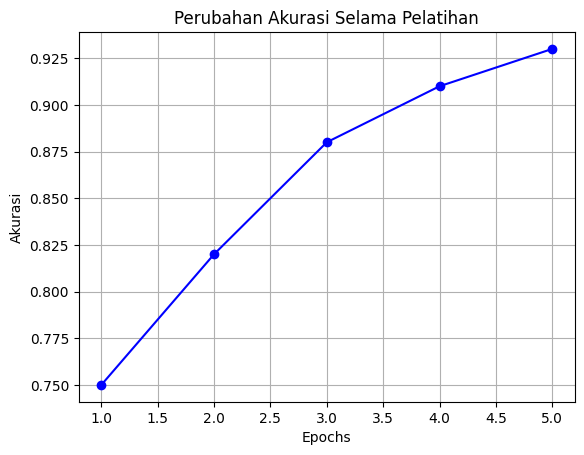

In [36]:
epochs = [1, 2, 3, 4, 5]  # Contoh jumlah epoch
accuracy = [0.75, 0.82, 0.88, 0.91, 0.93]  # Contoh nilai akurasi untuk setiap epoch

# Membuat grafik garis untuk menampilkan perubahan akurasi dari waktu ke waktu
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='b')

# Menambahkan label pada sumbu x dan y, serta judul plot
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.title('Perubahan Akurasi Selama Pelatihan')

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()